In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import csv
import pprint

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Others
import math
from datetime import datetime,timedelta

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [80]:
links = pd.read_csv('datas/train/links_(table_3).csv')
links = links.set_index('link_id')
routes = pd.read_csv('datas/train/routes_(table_4).csv')

In [98]:
links.head()

,length,width,lanes,in_top,out_top,lane_width
link_id,,,,,,
100,58,3,1,105,111,3
101,84,3,1,116,121,3
102,131,9,3,115,109,3
103,23,12,4,111,"122,116",3
104,293,9,3,109,112,3


In [81]:
links_dict = links.to_dict('index')

In [12]:
link_trajectories = pd.read_csv('training_20min_avg_travel_time.csv')
link_trajectories.time_window = link_trajectories.time_window.map(lambda s:s[1:20])
link_trajectories['avg_travel_flow'] = link_trajectories.sum_travel_time / (20*60)
link_trajectories["route"] = link_trajectories.intersection_id.map(str) + '->'+ link_trajectories.tollgate_id.map(str)

In [36]:
link_trajectories.head()

,intersection_id,tollgate_id,time_window,avg_travel_time,sum_travel_time,avg_travel_flow,route
0,B,3,2016-07-19 00:00:00,70.85,70.85,0.059042,B->3
1,B,3,2016-07-19 00:20:00,148.79,148.79,0.123992,B->3
2,B,3,2016-07-19 01:40:00,93.72,187.44,0.156200,B->3
3,B,3,2016-07-19 02:00:00,67.81,67.81,0.056508,B->3
4,B,3,2016-07-19 02:40:00,167.55,335.09,0.279242,B->3


In [41]:
routes.link_seq[0].split(',')

['110', '123', '107', '108', '120', '117']

In [92]:
routes['length'] = routes.link_seq.map(lambda s: sum(map(lambda x:links_dict[int(x)]['length'],s.split(','))))

In [96]:
routes['route'] =routes.intersection_id.map(str)+'->'+routes.tollgate_id.map(str)

In [100]:
routes

,intersection_id,tollgate_id,link_seq,length,route
0,A,2,"110,123,107,108,120,117",384,A->2
1,A,3,"110,123,107,108,119,114,118,122",852,A->3
2,B,1,"105,100,111,103,116,101,121,106,113",821,B->1
3,B,3,"105,100,111,103,122",477,B->3
4,C,1,"115,102,109,104,112,111,103,116,101,121,106,113",1550,C->1
5,C,3,"115,102,109,104,112,111,103,122",1206,C->3


In [124]:
speeds = []
for index,row in link_trajectories.iterrows():
    speeds.append( (routes_length[row['route']]) / row['avg_travel_time'] )

In [117]:
routes_length = routes.set_index('route')['length'].to_dict()

In [125]:
link_trajectories['speed'] = speeds

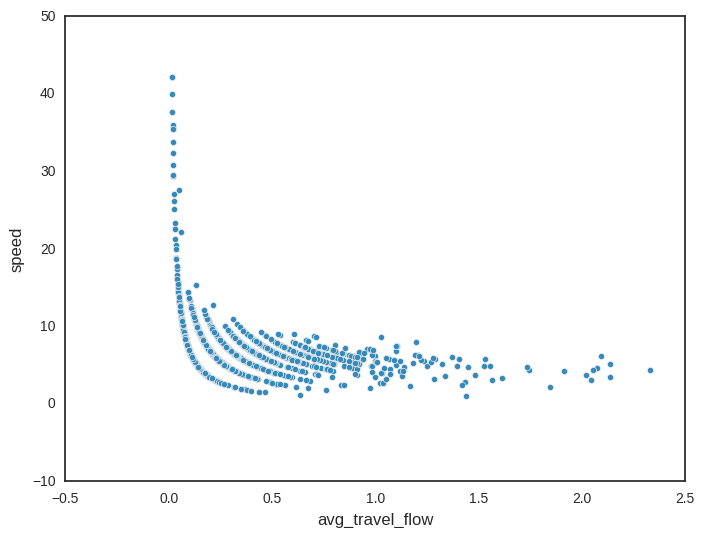

In [321]:
link_trajectories[link_trajectories.route== 'B->1'].plot(x='avg_travel_flow',y='speed',kind='scatter')

In [370]:
X = link_trajectories[link_trajectories.route== 'B->1'].avg_travel_flow.values
y = link_trajectories[link_trajectories.route== 'B->1'].speed.values
X_t = 1/X
y_t = y

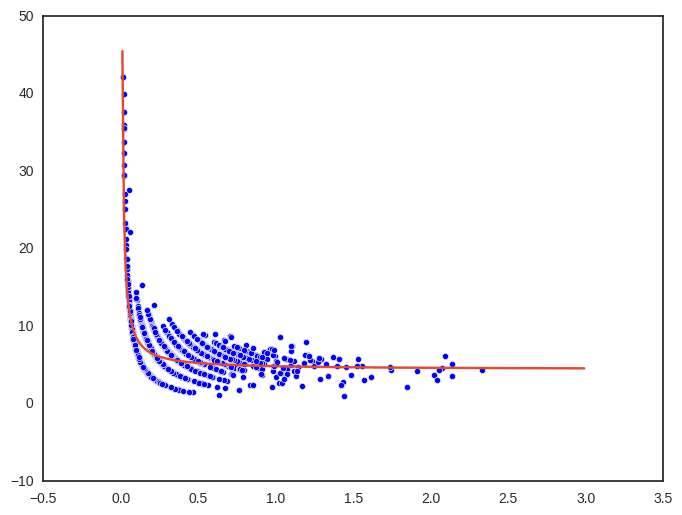

In [378]:
plt.scatter(X,y)
plt.plot(np.arange(0,3,0.01),predicted_y)

In [323]:
from scipy import optimize

In [372]:
def fn(x,a,b):
    return a*(1/x) + b

fita,fitb=optimize.curve_fit(fn,X,y,[1,1])

In [377]:
predicted_y = fn(np.arange(0,3,0.01), 0.41076187,  4.43621192)

In [373]:
fita

array([ 0.41076187,  4.43621192])

In [380]:
link_trajectories.to_csv('traffic_flow.csv',index=False)

In [383]:
link_trajectories[['route','time_window','avg_travel_flow','speed']].to_json('traffic_flow_route.json',orient='records')

In [385]:
link_trajectories.route.unique()

array(['B->3', 'B->1', 'A->3', 'A->2', 'C->3', 'C->1'], dtype=object)